# Import all needed Libraries/Module

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Read Data CSV

In [2]:
data = pd.read_csv('./Dataset_Calorie.csv',index_col=0)
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0
...,...,...,...,...,...,...,...,...,...,...
23986,72,95.444236,1.631113,F,35.874169,1510.154,1.3,1963.2002,9,26
23988,85,97.976899,1.631409,F,36.812724,1473.418,1.7,2504.8106,9,30
23994,50,97.761259,1.631864,F,36.711217,1635.925,1.7,2781.0725,9,31
23997,57,96.829324,1.631290,F,36.386871,1593.981,1.3,2072.1753,9,27


# Drop unused columns

In [3]:
data = data.drop(['Label', 'BMI_tags'], axis=1)
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008
2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511
4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982
6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091
8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...,...
23986,72,95.444236,1.631113,F,35.874169,1510.154,1.3,1963.2002
23988,85,97.976899,1.631409,F,36.812724,1473.418,1.7,2504.8106
23994,50,97.761259,1.631864,F,36.711217,1635.925,1.7,2781.0725
23997,57,96.829324,1.631290,F,36.386871,1593.981,1.3,2072.1753


In [4]:
# gather information about data attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10726 entries, 1 to 23998
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          10726 non-null  int64  
 1   weight(kg)                   10726 non-null  float64
 2   height(m)                    10726 non-null  float64
 3   gender                       10726 non-null  object 
 4   BMI                          10726 non-null  float64
 5   BMR                          10726 non-null  float64
 6   activity_level               10726 non-null  float64
 7   calories_to_maintain_weight  10726 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 754.2+ KB


In [5]:
data.isnull().sum()

age                            0
weight(kg)                     0
height(m)                      0
gender                         0
BMI                            0
BMR                            0
activity_level                 0
calories_to_maintain_weight    0
dtype: int64

In [6]:
# change gender data type from object to numeric
data['gender']=data['gender'].apply(lambda x: 1 if x=='F' else 0)
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
1,2,16.097862,0.932025,1,18.531612,958.584,1.2,1150.3008
2,4,14.619374,0.916687,1,17.397496,932.383,1.7,1585.0511
4,4,17.899918,0.997288,1,17.997414,977.578,1.9,1857.3982
6,3,13.532880,1.022786,1,12.936609,944.689,1.9,1794.9091
8,4,17.039484,1.053977,0,15.338909,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...,...
23986,72,95.444236,1.631113,1,35.874169,1510.154,1.3,1963.2002
23988,85,97.976899,1.631409,1,36.812724,1473.418,1.7,2504.8106
23994,50,97.761259,1.631864,1,36.711217,1635.925,1.7,2781.0725
23997,57,96.829324,1.631290,1,36.386871,1593.981,1.3,2072.1753


In [7]:
# Find info about the value of each attribute
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,10726.0,26.778575,18.201675,2.000000,13.000000,23.000000,36.000000,90.000000
weight(kg),10726.0,61.647728,24.254566,12.005536,45.538375,61.323460,83.484585,98.799820
height(m),10726.0,1.540276,0.186042,0.856328,1.564845,1.631282,1.632234,1.633223
gender,10726.0,0.519485,0.499643,0.000000,0.000000,1.000000,1.000000,1.000000
BMI,10726.0,24.788317,6.954637,10.342285,19.557137,23.056039,31.334294,37.142927
BMR,10726.0,1442.049923,250.686166,667.941000,1320.322500,1493.165000,1602.488000,1914.374000
activity_level,10726.0,1.487451,0.239625,1.200000,1.300000,1.500000,1.700000,1.900000
calories_to_maintain_weight,10726.0,2118.574075,388.425427,953.540900,1815.879700,2104.599800,2405.301750,2949.075500


In [8]:
corr=data.corr()
corr['calories_to_maintain_weight']

age                            0.394097
weight(kg)                     0.534520
height(m)                      0.577383
gender                        -0.133578
BMI                            0.429220
BMR                            0.600729
activity_level                 0.441669
calories_to_maintain_weight    1.000000
Name: calories_to_maintain_weight, dtype: float64

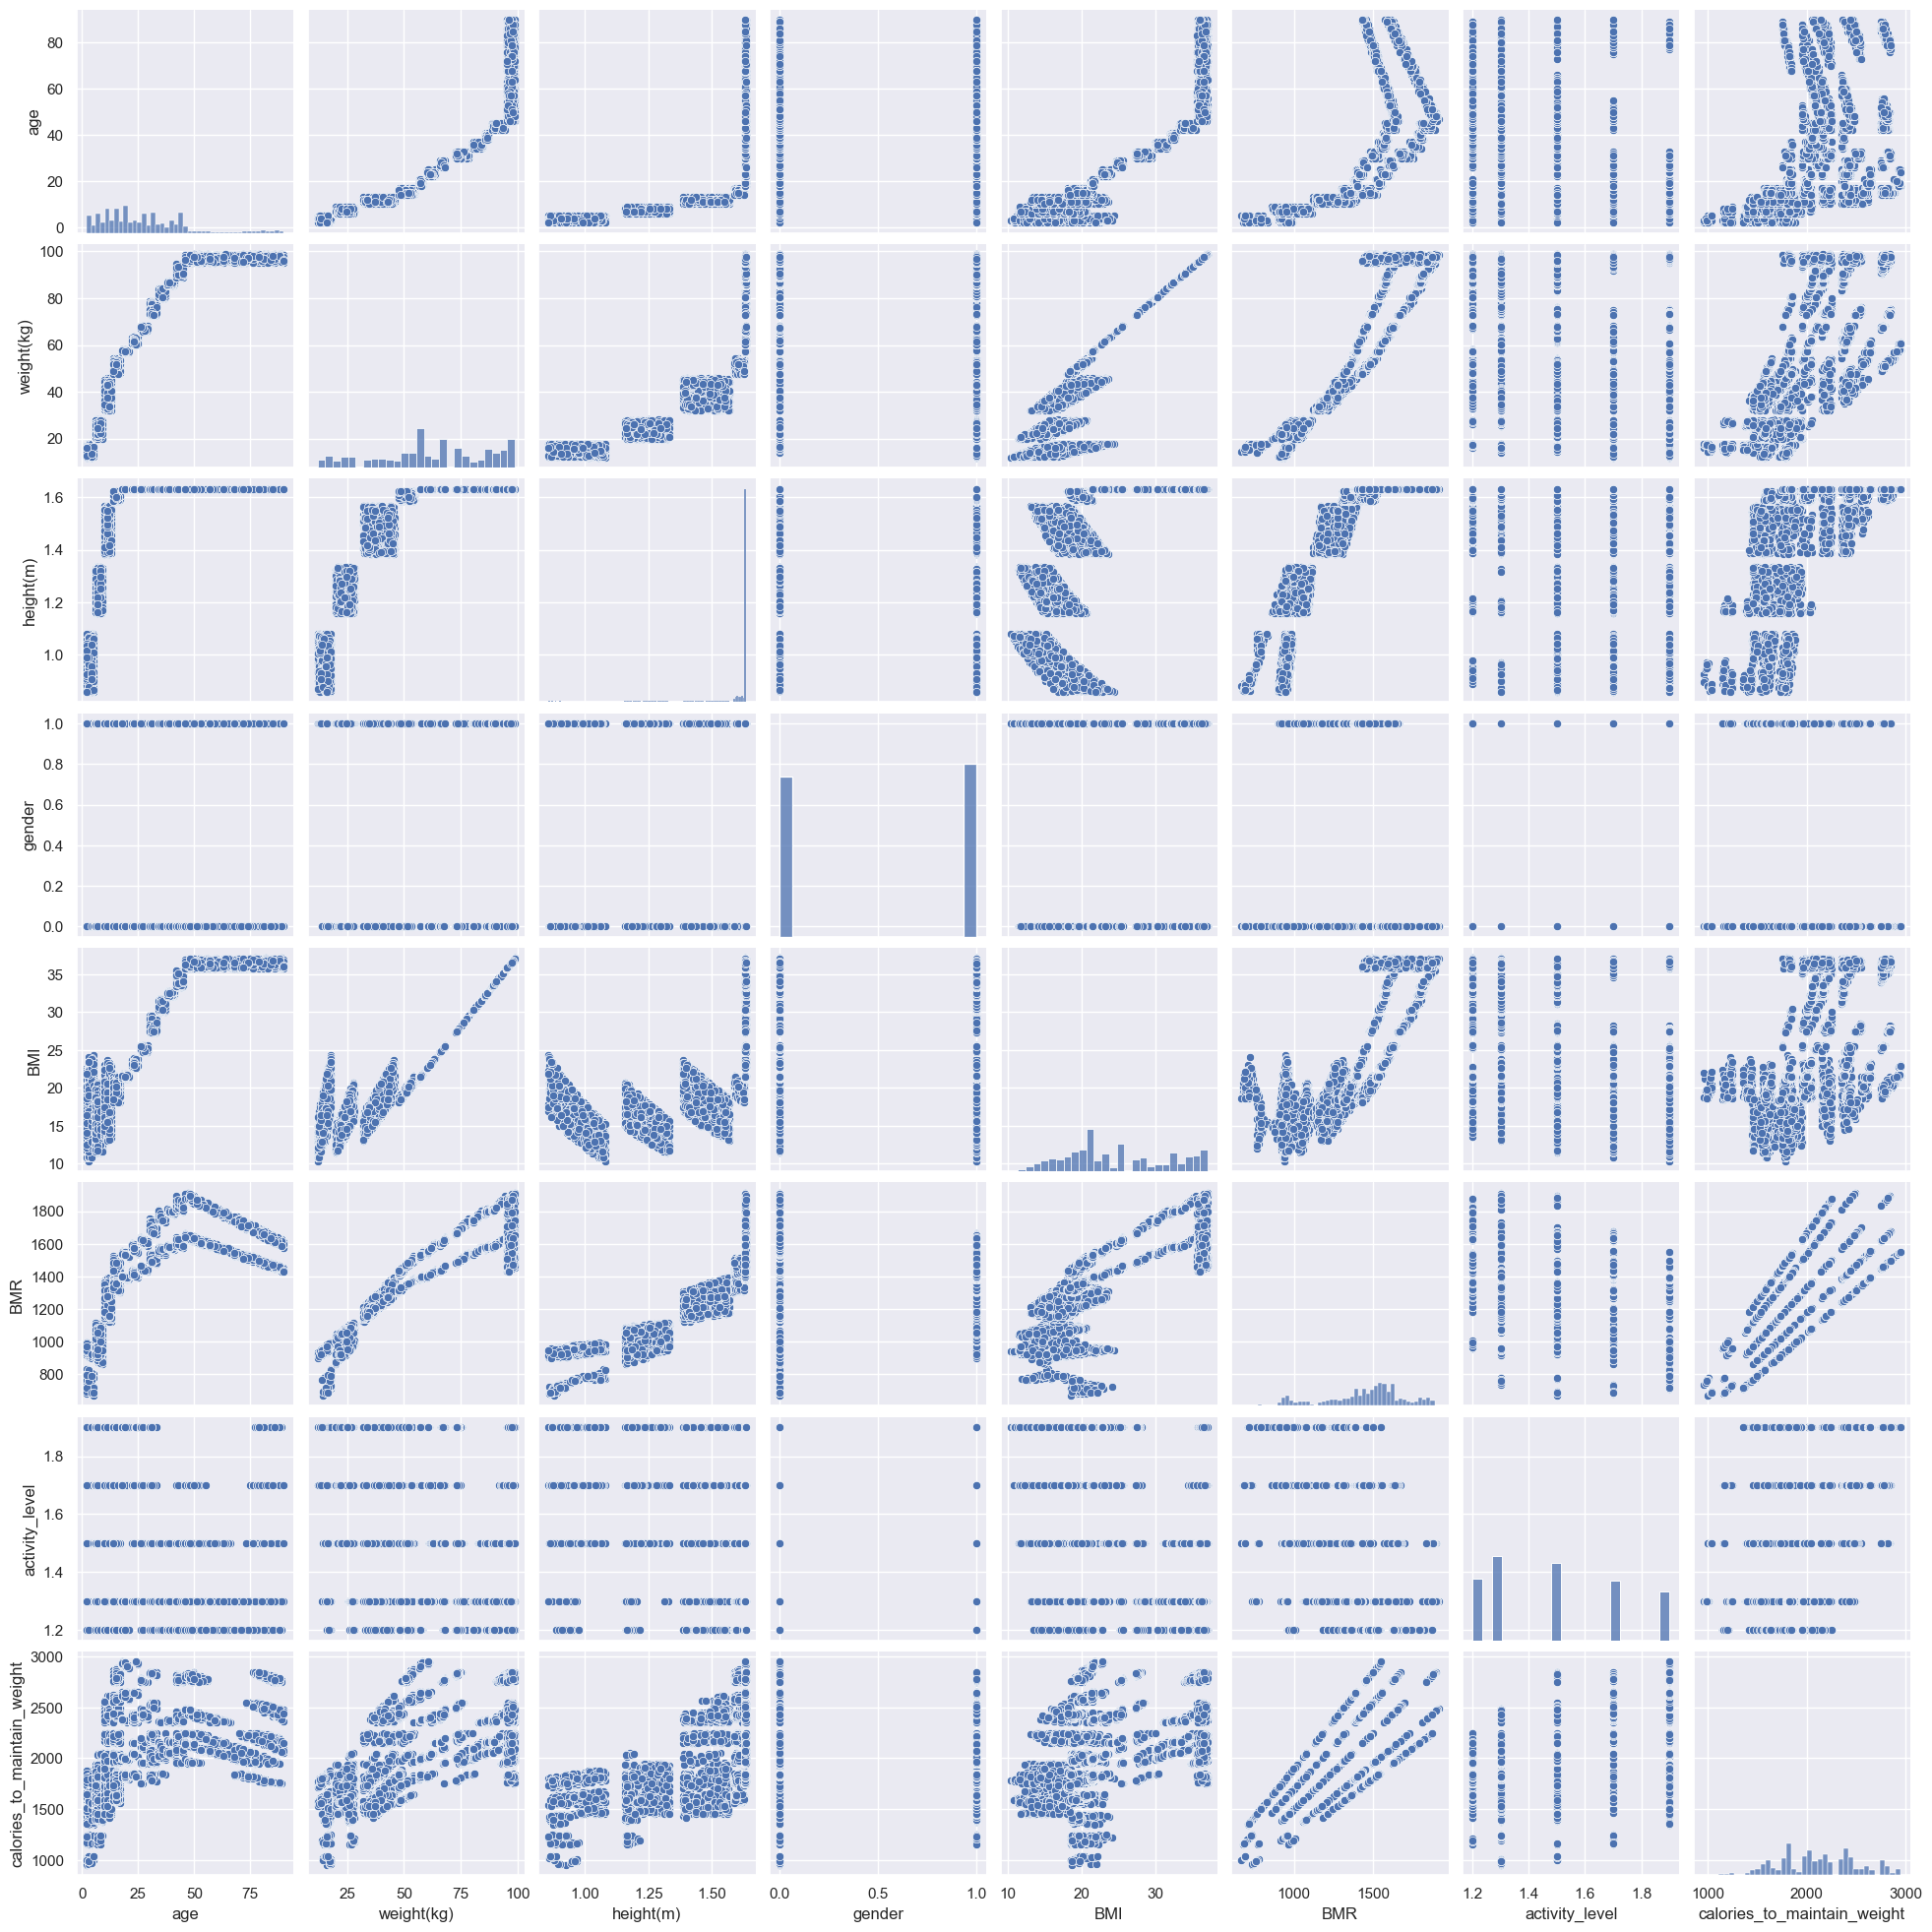

In [9]:
sns.set()
sns.pairplot(data)

In [10]:
x_train=data.drop('calories_to_maintain_weight',axis=1)
y_train=data['calories_to_maintain_weight']

Normalization dapat mengontrol proses normalisasi secara fleksibel, seperti menentukan nilai rata-rata dan deviasi standar yang diinginkan, atau menggunakan statistik empiris dari data pelatihan. Normalisasi ini membantu dalam menjaga skala data yang konsisten, mempercepat konvergensi model, dan menghindari masalah gradien yang tidak stabil.

In [11]:
# normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(x_train.shape[1],),axis=-1)
# normalizer.adapt(np.array(x_train))
# print(normalizer.mean.numpy())

In [12]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your input data in a NumPy array called 'X'
# X.shape = (num_samples, num_features)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on your input data
scaler.fit(data.drop('calories_to_maintain_weight', axis=1))

# Transform the input data using the fitted scaler
X_scaled = scaler.transform(data.drop('calories_to_maintain_weight', axis=1))

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)
x_train.shape,y_train.shape

((8580, 7), (8580,))

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),)
history=model.fit(x_train, y_train, epochs=200, batch_size=4,
                  validation_split=0.2)

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1716/1716 [==============================] - 1s 846us/step - loss: 1255.4036 - val_loss: 399.5514
Epoch 2/200
1716/1716 [==============================] - 1s 780us/step - loss: 159.8514 - val_loss: 107.7754
Epoch 3/200
1716/1716 [==============================] - 1s 740us/step - loss: 89.2845 - val_loss: 72.4703
Epoch 4/200
1716/1716 [==============================] - 2s 913us/step - loss: 62.2939 - val_loss: 54.0569
Epoch 5/200
1716/1716 [==============================] - 2s 951us/step - lo

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_loss(history,start,end):
  x_index=[x for x in range (start,end)]
  plt.plot(x_index,history.history['loss'][start-1:end-1], label='loss')
  plt.plot(x_index,history.history['val_loss'][start-1:end-1], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss MAE')
  plt.title(f'Loss betweeh epoch {start} and {end}')
  plt.legend()
  plt.grid(True)
  plt.show()

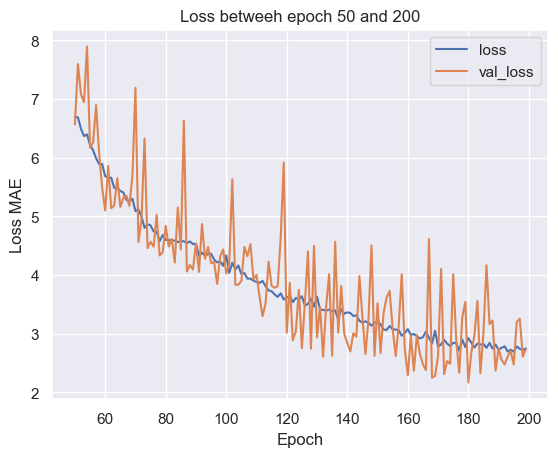

In [53]:
plot_loss(history,50,200)

In [54]:
model.evaluate(x_test,y_test)

68/68 [==============================] - 0s 725us/step - loss: 2.4868


2.4867820739746094

In [55]:
predict=model.predict(x_test)
predict.squeeze()

array([1521.5436, 1820.8259, 1472.4226, ..., 2105.861 , 2081.652 ,
       1461.6497], dtype=float32)

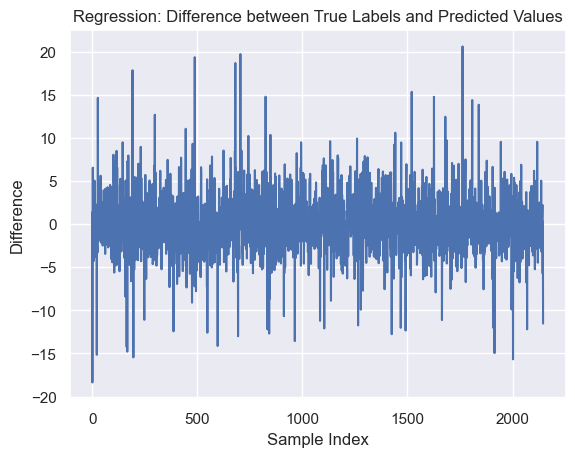

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your true labels in a NumPy array called 'y_true'
# Assuming you have your predicted values in a NumPy array called 'y_pred'

# Calculate the difference between true labels and predicted values
diff = y_test - predict.squeeze()

# Plotting the difference
plt.plot(np.arange(len(diff)), diff)
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.title('Regression: Difference between True Labels and Predicted Values')
plt.show()


In [57]:
diff.describe()

count    2146.000000
mean        0.074111
std         3.541284
min       -18.362428
25%        -1.816430
50%         0.189370
75%         1.737215
max        20.589663
Name: calories_to_maintain_weight, dtype: float64

hasil= y true - predict

* y true= data asli -> y_test
* predict= data prediksi -> hasil predict model terhadap x_test

if hasil<0 -> kalori yg diprediksi berlebihan

if hasil >0 -> kalori yg diprediksi kurang

In [58]:
sorted(diff) #jumlah kalori yang diprediksi berlebih

[-18.362427734374933,
 -15.68458671874987,
 -15.45708066406246,
 -15.157500585937441,
 -14.957625585937421,
 -14.789789062499949,
 -14.23283124999989,
 -14.137027343750106,
 -13.569011914062685,
 -13.009709570312452,
 -12.769080078125171,
 -12.69599140624996,
 -12.591481640625034,
 -12.437976953124917,
 -12.33672109374993,
 -12.216628710937584,
 -12.202147265624717,
 -12.10477109375006,
 -12.030352734374901,
 -12.007808398437419,
 -11.753327343750016,
 -11.536058203125094,
 -11.221127734375159,
 -11.129224609374887,
 -11.105945312499898,
 -10.682381640624953,
 -9.924835937499893,
 -9.906476171875056,
 -9.114607421875007,
 -8.89594218749994,
 -8.689153515625094,
 -8.381881640625124,
 -7.923905859374827,
 -7.842851562499845,
 -7.788725976562546,
 -7.718510937500014,
 -7.563969531250223,
 -7.555897656250181,
 -7.520225781250019,
 -7.355860156249946,
 -7.308652343750055,
 -7.3084632812501695,
 -7.223920312500013,
 -7.054569140625063,
 -6.945158984375212,
 -6.805820312499918,
 -6.7608326171

In [59]:
sorted(diff, reverse=True) #jumlah kalori yang diprediksi kekurangan kalori

[20.589663085937445,
 19.705650000000105,
 19.342544531249814,
 18.66865488281246,
 17.827993359374886,
 15.332133593750086,
 14.767153124999822,
 14.748816015624925,
 14.631424023437603,
 14.37556718750011,
 13.835589062499821,
 12.673912109374896,
 12.443285156250113,
 11.044923828124865,
 10.591347656249809,
 10.34258046874993,
 10.213850390624884,
 9.912923828124804,
 9.712514453125095,
 9.610201562499924,
 9.532851171874881,
 9.532309765625087,
 9.482575390624788,
 9.478758984374963,
 9.458263671875102,
 9.30473828124991,
 9.202911523437479,
 8.950196289062546,
 8.524403515625181,
 8.518253124999774,
 8.48664218749991,
 8.469626953125044,
 8.221524999999929,
 8.039169140624836,
 7.9608675781250895,
 7.945212890625044,
 7.888662109375218,
 7.824117968749761,
 7.7394287109375455,
 7.700640234374987,
 7.676876562500183,
 7.665616015624892,
 7.618560156249941,
 7.499287109375018,
 7.445881250000184,
 7.422216796875091,
 7.349872265624981,
 7.302617578124909,
 7.292425000000094,
 7.260